# Í∞ïÌôî ÌïôÏäµ

Î®ºÏ†Ä Î™á Í∞úÏùò Î™®ÎìàÏùÑ ÏûÑÌè¨Ìä∏ÌïúÎã§. Îß∑ÌîåÎ°ØÎ¶Ω Í∑∏Î¶ºÏùÑ Ï†ÄÏû•ÌïòÎäî Ìï®ÏàòÎ•º Ï§ÄÎπÑÌïúÎã§.

In [1]:
import matplotlib.animation as animation
import tensorflow as tf
from tensorflow import keras

if not tf.config.list_physical_devices("GPU"):
    print("Í∞êÏßÄÎêú GPUÍ∞Ä ÏóÜÏäµÎãàÎã§. GPUÍ∞Ä ÏóÜÏúºÎ©¥ LSTMÍ≥º CNNÏù¥ Îß§Ïö∞ ÎäêÎ¶¥ Ïàò ÏûàÏäµÎãàÎã§.")

# Í≥µÌÜµ Î™®Îìà ÏûÑÌè¨Ìä∏
import numpy as np
import os

# ÍπîÎÅîÌïú Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# Î∂ÄÎìúÎü¨Ïö¥ Ïï†ÎãàÎ©îÏù¥ÏÖòÏùÑ ÏúÑÌï¥
mpl.rc("animation", html="jshtml")

# Í∑∏Î¶ºÏùÑ Ï†ÄÏû•Ìï† ÏúÑÏπò
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print("Í∑∏Î¶º Ï†ÄÏû• " + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

2023-06-08 03:36:53.788234: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 03:36:56.332740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 03:36:56.368960: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 03:36:56.369215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

## OpenAI Ïßê

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ Í∞ïÌôîÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Í∞úÎ∞úÌïòÍ≥† ÌèâÍ∞ÄÌïòÎäî ÌõåÎ•≠Ìïú ÎèÑÍµ¨Ïù∏ [OpenAI Ïßê(gymnasium)](https://gymnasium.farama.org/)ÏùÑ ÏÇ¨Ïö©ÌïúÎã§. ÌïôÏäµ ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÏÉÅÌò∏ÏûëÏö©ÌïòÍ∏∞ ÏúÑÌïú ÌôòÍ≤ΩÏùÑ ÎßéÏù¥ Ï†úÍ≥µÌïúÎã§. Î®ºÏ†Ä `gymnasium`ÏùÑ ÏûÑÌè¨Ìä∏ÌïúÎã§:

In [2]:
import gymnasium as gym

Í∞ÄÎä•Ìïú ÌôòÍ≤Ω Î™©Î°ùÏùÑ ÌôïÏù∏ÌïúÎã§:

In [3]:
gym.envs.registry.values()

dict_values([EnvSpec(id='CartPole-v0', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=0, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv'), EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv'), EnvSpec(id='MountainCar-v0', entry_point='gymnasium.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=Fals

Cart-PoleÏùÄ Îß§Ïö∞ Í∞ÑÎã®Ìïú ÌôòÍ≤ΩÏúºÎ°ú ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏõÄÏßÅÏù¥Îäî Ïπ¥Ìä∏ÏôÄ Í∑∏ ÏúÑÏóê ÏàòÏßÅÏúºÎ°ú ÎÜìÏó¨ ÏûàÎäî ÎßâÎåÄÎ°ú Íµ¨ÏÑ±ÎêúÎã§. ÏóêÏù¥Ï†ÑÌä∏Îäî Ïπ¥Ìä∏Î•º ÏôºÏ™ΩÏù¥ÎÇò Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏõÄÏßÅÏó¨ ÎßâÎåÄÍ∞Ä Î∞îÎ°ú ÏÑú ÏûàÎèÑÎ°ù ÎßåÎì§Ïñ¥Ïïº ÌïúÎã§.

In [4]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

`reset()` Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï¥ ÌôòÍ≤ΩÏùÑ Ï¥àÍ∏∞ÌôîÌïúÎã§. Ïù¥ Î©îÏÑúÎìúÎäî Í¥ÄÏ∏°ÏùÑ Î∞òÌôòÌïúÎã§:

In [5]:
obs, _ = env.reset(seed=42)

Í¥ÄÏ∏°ÏùÄ ÌôòÍ≤ΩÏóê Îî∞Îùº Îã§Î•¥Îã§. Ïù¥ Í≤ΩÏö∞ 4Í∞úÏùò Ïã§ÏàòÎ°ú Íµ¨ÏÑ±Îêú 1D ÎÑòÌååÏù¥ Î∞∞Ïó¥Ïù¥Îã§. Ïπ¥Ìä∏Ïùò ÏàòÌèâ ÏúÑÏπò, ÏÜçÎèÑ, ÎßâÎåÄÏùò Í∞ÅÎèÑ(0=ÏàòÏßÅ), Í∞ÅÏÜçÎèÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§.

In [6]:
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

ÌôòÍ≤ΩÏùÄ `render()` Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌïòÏó¨ ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÎã§. Í∑∏Î¶¨Í≥† Î†åÎçîÎßÅ Î™®Îìú(ÌôòÍ≤ΩÏóê Îî∞Î•∏ Î†åÎçîÎßÅ ÏòµÏÖò)Î•º ÏÑ†ÌÉùÌï† Ïàò ÏûàÎã§.

**Í≤ΩÍ≥†**: (Cart-PoleÏùÑ Ìè¨Ìï®Ìï¥) ÏùºÎ∂Ä ÌôòÍ≤ΩÏùÄ ÌôîÎ©¥ Ï†ëÍ∑º Í∂åÌïúÏù¥ ÌïÑÏöîÌïòÎã§. `render_mode="rgb_array"`Î°ú ÏßÄÏ†ïÌïòÎçîÎùºÎèÑ Î≥ÑÎèÑÏùò ÏúàÎèÑÏö∞Î•º Ïó∞Îã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïù¥ ÏúàÎèÑÏö∞Î•º Î¨¥ÏãúÌï† Ïàò ÏûàÎã§.

In [7]:
env.render()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Ïù¥ ÏòàÏóêÏÑúÎäî `render_mode="rgb_array"`Î°ú ÏßÄÏ†ïÌï¥ ÌôòÍ≤Ω Ïù¥ÎØ∏ÏßÄÎ•º ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î∞õÎäîÎã§:

In [8]:
img = env.render()
img.shape

(400, 600, 3)

In [9]:
def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

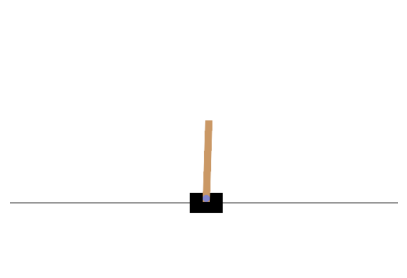

In [10]:
plot_environment(env)
plt.show()

ÌôòÍ≤ΩÍ≥º ÏÉÅÌò∏ÏûëÏö©ÌïòÎäî Î∞©Î≤ïÏùÑ ÏïåÏïÑ Î≥∏Îã§. ÏóêÏù¥Ï†ÑÌä∏Îäî "ÌñâÎèô Í≥µÍ∞Ñ"(Í∞ÄÎä•Ìïú ÌñâÎèôÏùò ÏßëÌï©)ÏóêÏÑú ÌïòÎÇòÏùò ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌï¥Ïïº ÌïúÎã§. Ïù¥ ÌôòÍ≤ΩÏùò ÌñâÎèô Í≥µÍ∞ÑÏùÑ Îã§ÏùåÏ≤òÎüº ÌôïÏù∏ÌïúÎã§:

In [11]:
env.action_space

Discrete(2)

Îã® Îëê Í∞úÏùò ÌñâÎèôÏù¥ Í∞ÄÎä•ÌïòÎã§: ÏôºÏ™Ω ÎòêÎäî Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∞ÄÏÜçÌïúÎã§.

ÎßâÎåÄÍ∞Ä Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∏∞Ïö∏Ïñ¥Ï†∏ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê(`obs[2] > 0`), Ïπ¥Ìä∏Î•º Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∞ÄÏÜçÌïúÎã§:

In [12]:
action = 1  # Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∞ÄÏÜç
obs, reward, terminated, truncated, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

Ïù¥Ï†ú Ïπ¥Ìä∏Í∞Ä Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏõÄÏßÅÏòÄÎã§(`obs[1] > 0`). ÎßâÎåÄÍ∞Ä Ïó¨Ï†ÑÌûà Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∏∞Ïö∏ÏóàÎã§(`obs[2] > 0`). ÌïòÏßÄÎßå Í∞ÅÏÜçÎèÑÍ∞Ä ÏùåÏàòÏù¥ÎØÄÎ°ú(`obs[3] < 0`) Îã§Ïùå Ïä§ÌÖùÏóêÏÑúÎäî ÏôºÏ™ΩÏúºÎ°ú Í∏∞Ïö∏ Í≤ÉÏù¥Îã§.

Í∑∏Î¶º Ï†ÄÏû• cart_pole_plot


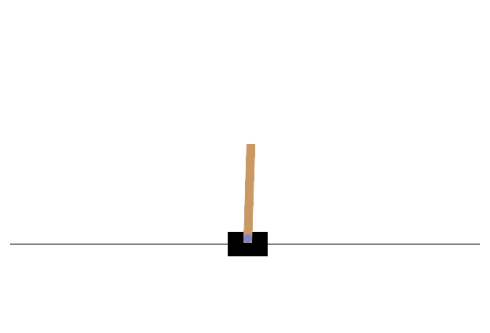

In [13]:
plot_environment(env)
save_fig("cart_pole_plot")

ÏöîÏ≤≠Ìïú ÎåÄÎ°ú Ïã§ÌñâÎêúÎã§!

ÌôòÍ≤ΩÏùÄ Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú ÏñºÎßàÎÇò ÎßéÏùÄ Î≥¥ÏÉÅÏùÑ Î∞õÎäîÏßÄ ÏóêÏù¥Ï†ÑÌä∏ÏóêÍ≤å ÏïåÎ¶∞Îã§:

In [14]:
reward

1.0

Í≤åÏûÑÏù¥ ÎÅùÎÇòÎ©¥ ÌôòÍ≤ΩÏùÄ `terminated = True`ÎÇò `truncated = True`Î•º Î∞òÌôòÌïúÎã§:

In [15]:
terminated, truncated

(False, False)

ÎßàÏßÄÎßâÏúºÎ°ú `info`Îäî ÌõàÎ†®Ïù¥ÎÇò ÎîîÎ≤ÑÍπÖÏóê Ïú†Ïö©Ìïú Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†ïÎ≥¥Î•º Îã¥ÏùÄ ÌôòÍ≤ΩÏóê ÌäπÌôîÎêú ÎîïÏÖîÎÑàÎ¶¨Ïù¥Îã§. ÏòàÎ•º Îì§Ïñ¥ ÏùºÎ∂Ä Í≤åÏûÑÏóêÏÑúÎäî ÏñºÎßàÎÇò ÎßéÏùÄ ÏóêÏù¥Ï†ÑÌä∏Ïùò ÏÉùÎ™ÖÏù¥ Î™á Í∞úÍ∞Ä ÎÇ®ÏïÑ ÏûàÎäîÏßÄ ÎÇòÌÉÄÎÇ∏Îã§.

In [16]:
info

{}

ÌôòÍ≤ΩÏù¥ Ïû¨ÏÑ§Ï†ïÎêú ÏàúÍ∞ÑÎ∂ÄÌÑ∞ Ï¢ÖÎ£åÎê† ÎïåÍπåÏßÄ Ïä§ÌÖù ÏãúÌÄÄÏä§Î•º "ÏóêÌîºÏÜåÎìú"ÎùºÍ≥† ÌïúÎã§. ÏóêÌîºÏÜåÎìú ÎÅùÏóêÏÑú(Ï¶â, `step()`Ïù¥ `terminated = True`ÎÇò `truncated = True`Î•º Î∞òÌôòÌï† Îïå), Í≥ÑÏÜçÌïòÍ∏∞ Ï†ÑÏóê ÌôòÍ≤ΩÏùÑ Ïû¨ÏÑ§Ï†ïÌï¥Ïïº ÌïúÎã§.

In [17]:
if terminated | truncated:
    env.reset()

Í∑∏Îüº Ïñ¥ÎñªÍ≤å ÎßâÎåÄÎ•º ÎòëÎ∞îÎ°ú Ïú†ÏßÄÌï† Ïàò ÏûàÏùÑÍπå? Ïù¥Î•º ÏúÑÌï¥ Ï†ïÏ±ÖÏùÑ Ï†ïÏùòÌï¥Ïïº ÌïúÎã§. ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Îß§ Ïä§ÌÖùÎßàÎã§ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† Ï†ÑÎûµÏù¥Îã§. Ïñ¥Îñ§ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌï†ÏßÄ Í≤∞Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÄÎÇú ÌñâÎèôÍ≥º Í¥ÄÏ∏°ÏùÑ Î™®Îëê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

**Í∞ÑÎã®Ìïú ÌïòÎìú ÏΩîÎî© Ï†ïÏ±Ö**

Í∞ÑÎã®Ìïú Ï†ïÏ±ÖÏùÑ ÌïòÎìú ÏΩîÎî©ÌïúÎã§. ÎßâÎåÄÍ∞Ä ÏôºÏ™ΩÏúºÎ°ú Í∏∞Ïö∏Ïñ¥ÏßÄÎ©¥ Ïπ¥Ìä∏Î•º ÏôºÏ™ΩÏúºÎ°ú ÏõÄÏßÅÏù¥Í≥† Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∏∞Ïö∏Ïñ¥ÏßÄÎ©¥ Î∞òÎåÄÎ°ú ÏõÄÏßÅÏù∏Îã§. Ïñ¥ÎñªÍ≤å ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏ÌïúÎã§:

In [18]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1


totals = []
for episode in range(500):
    episode_rewards = 0
    obs, _ = env.reset()
    while True:
        action = basic_policy(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        episode_rewards += reward
        if terminated | truncated:
            break
    totals.append(episode_rewards)

In [19]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.18, 9.015963620157304, 24.0, 72.0)

ÏòàÏÉÅÎåÄÎ°ú Ïù¥ Ï†ÑÎûµÏùÄ ÎÑàÎ¨¥ Îã®ÏàúÌïòÎã§. ÏµúÎåÄÎ°ú ÎßâÎåÄÎ•º Ïú†ÏßÄÌïú Ïä§ÌÖù ÌöüÏàòÍ∞Ä 72Ïù¥Îã§. Ïù¥ ÌôòÍ≤ΩÏùÄ ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÎßâÎåÄÎ•º 200 Ïä§ÌÖù Ïù¥ÏÉÅ Ïú†ÏßÄÌï¥Ïïº Ìï¥Í≤∞Îêú Í≤ÉÏúºÎ°ú Í∞ÑÏ£ºÌïúÎã§.

ÌïòÎÇòÏùò ÏóêÌîºÏÜåÎìúÎ•º ÏãúÍ∞ÅÌôîÌïúÎã§:

In [20]:
frames = []
obs, _ = env.reset()
while True:
    img = env.render()
    frames.append(img)
    action = basic_policy(obs)
    obs, _, terminated, truncated, _ = env.step(action)
    if terminated | truncated:
        break

Ïï†ÎãàÎ©îÏù¥ÏÖòÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§:

In [21]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch


def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis("off")
    anim = animation.FuncAnimation(
        fig, update_scene, len(frames), fargs=(frames, patch), repeat=repeat, interval=interval
    )
    plt.close()
    return anim

In [22]:
plot_animation(frames)

ÌôïÏã§Ìûà Ïù¥ Î∞©Î≤ïÏùÄ Î∂àÏïàÏ†ïÌï¥ÏÑú ÏïΩÍ∞Ñ ÌùîÎì§Î¶¨Î©¥ ÎßâÎåÄÍ∞Ä ÎÑàÎ¨¥ Í∏∞Ïö∏Ïñ¥Ï†∏ Í≤åÏûÑÏù¥ ÎÅùÎÇúÎã§. Ïù¥ Î≥¥Îã§Îäî Îçî ÎòëÎòëÌïú Ï†ÑÎûµÏù¥ ÌïÑÏöîÌïòÎã§!

## Ïã†Í≤ΩÎßù Ï†ïÏ±Ö

Í¥ÄÏ∏°ÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ≥† Í∞Å Í¥ÄÏ∏°Ïóê ÎåÄÌï¥ ÏÑ†ÌÉùÌï† ÌñâÎèôÏùò ÌôïÎ•†ÏùÑ Ï∂úÎ†•ÌïòÎäî Ïã†Í≤ΩÎßùÏùÑ ÎßåÎì†Îã§. ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÍ∏∞ ÏúÑÌï¥ Ïã†Í≤ΩÎßùÏùÄ Í∞Å ÌñâÎèôÏùò ÌôïÎ•†ÏùÑ Ï∂îÏ†ïÌïúÎã§. Ïù¥ Ï∂îÏ†ïÎêú ÌôïÎ•†Ïóê Îî∞Îùº ÎûúÎç§ÌïòÍ≤å ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïúÎã§. Cart-Pole ÌôòÍ≤ΩÏùò Í≤ΩÏö∞ Îëê Í∞úÏùò Í∞ÄÎä•Ìïú ÌñâÎèôÏù¥ ÏûàÎã§(ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™Ω). Îî∞ÎùºÏÑú ÌïòÎÇòÏùò Ï∂úÎ†• Îâ¥Îü∞Îßå ÏûàÏúºÎ©¥ ÎêúÎã§. Ïù¥ Îâ¥Îü∞ÏùÄ ÌñâÎèô 0(ÏôºÏ™Ω)Ïùò ÌôïÎ•† `p`Î•º Ï∂úÎ†•ÌïúÎã§. Î¨ºÎ°† ÌñâÎèô 1(Ïò§Î•∏Ï™Ω)Ïùò ÌôïÎ•†ÏùÄ `1 - p`Ïù¥Îã§.

In [23]:
keras.backend.clear_session()
n_inputs = 4  # == env.observation_space.shape[0]
model = keras.Sequential([keras.layers.Dense(5, "elu", input_shape=[n_inputs]), keras.layers.Dense(1, "sigmoid")])

2023-06-08 03:36:59.985493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 03:36:59.985749: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 03:36:59.985923: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 03:37:01.051895: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 03:37:01.052174: I tensorflow/compile

Ïù¥ ÌôòÍ≤ΩÏóêÏÑúÎäî ÏßÄÎÇú ÌñâÎèôÍ≥º Í¥ÄÏ∏°ÏùÑ Î¨¥ÏãúÌïúÎã§. Í∞Å Í¥ÄÏ∏°Ïù¥ ÏôÑÏ†ÑÌïú ÌôòÍ≤ΩÏùò ÏÉÅÌÉúÎ•º Îã¥Í≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. ÏùÄÎãâ ÏÉÅÌÉúÍ∞Ä ÏûàÎã§Î©¥ ÌôòÍ≤ΩÏùò ÏùÄÎãâ ÏÉÅÌÉúÎ•º Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÄÎÇú ÌñâÎèôÍ≥º Í¥ÄÏ∏°ÏùÑ Í≥†Î†§ÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥, Ïù¥ ÌôòÍ≤ΩÏù¥ Ïπ¥Ìä∏Ïùò ÏúÑÏπòÎßå Ï†úÍ≥µÌïòÍ≥† ÏÜçÎèÑÎ•º ÏïåÎ†§ Ï£ºÏßÄ ÏïäÎäîÎã§Î©¥, ÌòÑÏû¨ ÏÜçÎèÑÎ•º Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÌòÑÏû¨ Í¥ÄÏ∏° ÎøêÎßå ÏïÑÎãàÎùº ÏßÄÎÇú Í¥ÄÏ∏°ÎèÑ Í≥†Î†§ÌïúÎã§. Îòê Îã§Î•∏ ÏòàÎäî Í¥ÄÏ∏°Ïóê Ïû°ÏùåÏù¥ ÏûàÎäî Í≤ΩÏö∞Ïù¥Îã§. Í∞ÄÏû• Í∞ÄÎä•ÏÑ± ÏûàÎäî ÌòÑÏû¨ ÏÉÅÌÉúÎ•º Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÄÎÇú Î™á Í∞úÏùò Í¥ÄÏ∏°ÏùÑ ÏÇ¨Ïö©ÌïúÎã§. Ïù¥ Î¨∏Ï†úÎäî Îß§Ïö∞ Í∞ÑÎã®ÌïòÎã§. ÌòÑÏû¨ Í¥ÄÏ∏°Ïóê Ïû°ÏùåÏù¥ ÏóÜÍ≥† ÌôòÍ≤ΩÏùò Î™®Îì† ÏÉÅÌÉúÍ∞Ä Îã¥Í∏¥Îã§.

Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä Ï∂úÎ†•Ìïú ÌôïÎ•† Ï§ëÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Í∞ÄÏßÑ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÏßÄ ÏïäÍ≥† ÎûúÎç§Ìïú ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÎäî Ïù¥Ïú†Í∞Ä Í∂ÅÍ∏àÌï†ÏßÄ Î™®Î•∏Îã§. Ïù¥ Î∞©Î≤ïÏùÄ ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÏÉàÎ°úÏö¥ ÌñâÎèôÏùÑ ÌÉêÌóòÌïòÎäî Í≤ÉÍ≥º Ïûò ÎèôÏûëÌïòÎäî ÌñâÎèôÏùÑ ÌôúÏö©ÌïòÎäî Í≤É ÏÇ¨Ïù¥Ïóê Î∞∏Îü∞Ïä§Î•º Ï∞æÎèÑÎ°ù ÌïúÎã§. ÎπÑÏú†Î•º Îì§Í≤†Îã§. Ìïú ÏùåÏãùÏ†êÏóê Ï≤òÏùå Î∞©Î¨∏ÌñàÎã§Í≥† Í∞ÄÏ†ïÌïúÎã§. Î™®Îì† ÏùåÏãùÏóê ÎåÄÌïú ÏÑ†Ìò∏ÎèÑÍ∞Ä ÎèôÏùºÌïòÎã§Î©¥ ÎûúÎç§ÌïòÍ≤å ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïúÎã§. Ïù¥ ÏùåÏãùÏù¥ Ï¢ãÎã§Í≥† ÎäêÎÇÄÎã§Î©¥ Îã§Ïùå Î≤àÏóê Ïù¥ ÏùåÏãùÏùÑ Ï£ºÎ¨∏Ìï† ÌôïÎ•†ÏùÑ ÎÜíÏùº Ïàò ÏûàÎã§. ÌïòÏßÄÎßå Ïù¥ ÌôïÎ•†ÏùÑ 100%Î°ú ÎÜíÏó¨ÏÑúÎäî Ïïà ÎêúÎã§. Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ Îã§Î•∏ ÏùåÏãùÏùÑ ÏãúÎèÑÌï¥ Î≥º Ïàò ÏóÜÎã§. Ïñ¥Ï©åÎ©¥ Îã§Î•∏ ÏùåÏãùÏù¥ Ïù¥Î≤àÏóê Î®πÏùÄ Í≤ÉÎ≥¥Îã§ Ìõ®Ïî¨ Îçî Ï¢ãÏùÑ ÏàòÎèÑ ÏûàÎã§.

Î™®Îç∏ÏùÑ Ïã§ÌñâÌïòÏó¨ Ìïú ÏóêÌîºÏÜåÎìúÎ•º ÌîåÎ†àÏù¥ÌïòÍ≥† Ïï†ÎãàÎ©îÏù¥ÏÖòÏùÑ ÏúÑÌïú ÌîÑÎ†àÏûÑÏùÑ Î∞òÌôòÌïòÎäî Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïúÎã§:

In [24]:
from numpy.random import default_rng

rng = default_rng()


def render_policy_net(model):
    frames = []
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    obs, _ = env.reset()
    while True:
        frames.append(env.render())
        left_proba = model.predict(obs.reshape(1, -1), use_multiprocessing=True)
        action = int(rng.random() > left_proba)
        obs, _, terminated, truncated, _ = env.step(action)
        if terminated | truncated:
            break
    env.close()
    return frames

ÎûúÎç§ÌïòÍ≤å Ï¥àÍ∏∞ÌôîÎêú Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä ÏñºÎßàÎÇò Ïûò ÏàòÌñâÌïòÎäîÏßÄ ÌôïÏù∏ÌïúÎã§:

In [25]:
frames = render_policy_net(model)
plot_animation(frames)

1/1 [==============================] - 0s 13ms/step


ÏïÑÏ£º ÎÇòÏÅòÎã§. Ïù¥ Ïã†Í≤ΩÎßùÏùÄ Îçî Î∞∞ÏõåÏïº ÌïúÎã§. Î®ºÏ†Ä ÏïûÏóêÏÑú ÏÇ¨Ïö©Ìïú Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ïÏ±ÖÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏ÌïúÎã§. ÎßâÎåÄÍ∞Ä ÏôºÏ™ΩÏúºÎ°ú Í∏∞Ïö∏Î©¥ ÏôºÏ™ΩÏúºÎ°ú ÏõÄÏßÅÏù¥Í≥†, Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∏∞Ïö∏Î©¥ Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏõÄÏßÅÏù¥ÎèÑÎ°ù ÌïúÎã§.

Í∞ôÏùÄ Ïã†Í≤ΩÎßùÏúºÎ°ú ÎèôÏãúÏóê 50Í∞úÏùò Îã§Î•∏ ÌôòÍ≤ΩÏùÑ ÌîåÎ†àÏù¥ÌïúÎã§(Ïù¥Î†áÍ≤å ÌïòÎ©¥ Í∞Å Ïä§ÌÖùÎßàÎã§ Îã§ÏñëÌïú ÌõàÎ†® Î∞∞ÏπòÎ•º ÏñªÎäîÎã§). Í∑∏Î¶¨Í≥† 5000Î≤à Î∞òÎ≥µ ÎèôÏïàÏóê ÌõàÎ†®ÌïúÎã§. Í≤åÏûÑÏù¥ Ï¢ÖÎ£åÎêòÎ©¥ ÌôòÍ≤ΩÏùÑ Ïû¨ÏÑ§Ï†ïÌïúÎã§. ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌõàÎ†® Î£®ÌîÑÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÌõàÎ†® Ïä§ÌÖùÎßàÎã§ ÌôòÍ≤ΩÏóê ÏïûÏÑú ÏòàÏ∏°ÏùÑ ÏâΩÍ≤å ÎßåÎì§ Ïàò ÏûàÎã§.

In [26]:
n_environments = 50
n_iterations = 1  # 5000
envs = [gym.make("CartPole-v1") for _ in range(n_environments)]
observations = [env.reset()[0] for env in envs]
optimizer = keras.optimizers.experimental.RMSprop()
loss_fn = keras.losses.BinaryCrossentropy()
for iteration in range(n_iterations):
    # angle < 0Ïù¥Î©¥ proba(left) = 1., Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ proba(left) = 0.Ïù¥ ÎêúÎã§.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations))
        loss = tf.math.reduce_mean(loss_fn(target_probas, left_probas))
    print(f"Iteration: {iteration}, Loss: {loss.numpy():.3f}", end="\r")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (rng.random((n_environments, 1)) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, _, terminated, truncated, _ = env.step(actions[env_index][0])
        observations[env_index] = obs if not terminated | truncated else env.reset()[0]
for env in envs:
    env.close()

2023-06-08 03:37:02.755279: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x2113dcc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-08 03:37:02.755318: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-06-08 03:37:02.758889: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-08 03:37:03.776652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-06-08 03:37:03.818613: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-08 03:37:03.928869: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [27]:
frames = render_policy_net(model)
plot_animation(frames)

1/1 [==============================] - 0s 14ms/step


Ï†ïÏ±ÖÏùÑ Ïûò ÌïôÏäµÌñàÎã§. Ïù¥Ï†ú Ïä§Ïä§Î°ú Îçî ÎÇòÏùÄ Ï†ïÏ±ÖÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏ÌïúÎã§.

## Ï†ïÏ±Ö Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏

Ïù¥ Ïã†Í≤ΩÎßùÏùÑ ÌõàÎ†®ÌïòÎ†§Î©¥ ÌÉÄÍπÉ ÌôïÎ•† `y`Î•º Ï†ïÏùòÌï¥Ïïº ÌïúÎã§. ÌñâÎèôÏù¥ Ï¢ãÏúºÎ©¥ Ìï¥Îãπ ÌôïÎ•†ÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ§Í≥† Î∞òÎåÄÎ°ú ÎÇòÏÅòÎ©¥ Í∞êÏÜåÏãúÌÇ®Îã§. ÌïòÏßÄÎßå ÌñâÎèôÏù¥ Ï¢ãÏùÄÏßÄ ÎÇòÏÅúÏßÄ Ïñ¥ÎñªÍ≤å ÏïåÍπå? ÎåÄÎ∂ÄÎ∂Ñ ÌñâÎèôÏùò Ìö®Í≥ºÍ∞Ä ÏßÄÏó∞ÎêòÏñ¥ ÎÇòÌÉÄÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê Ìïú ÏóêÌîºÏÜåÎìúÏóêÏÑú Ï†êÏàòÎ•º ÏñªÍ±∞ÎÇò ÏûÉÏùÑ Îïå Ïñ¥Îñ§ ÌñâÎèôÏù¥ Ïù¥ Í≤∞Í≥ºÏóê Í∏∞Ïó¨ÌñàÎäîÏßÄ Î™ÖÌôïÌïòÏßÄ ÏïäÎã§. ÎßàÏßÄÎßâ ÌñâÎèôÏùºÍπå? ÏïÑÎãàÎ©¥ ÎßàÏßÄÎßâÏóêÏÑú 10Î≤àÏß∏ ÌñâÎèôÏùºÍπå? ÏïÑÎãàÎ©¥ 50 Ïä§ÌÖù Ïù¥Ï†ÑÏùò ÌñâÎèôÏùºÍπå? Ïù¥Î•º _Ïã†Ïö© Ìï†Îãπ Î¨∏Ï†ú_ ÎùºÍ≥† Î∂ÄÎ•∏Îã§.

_Ï†ïÏ±Ö Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏_ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Î®ºÏ†Ä Ïó¨Îü¨ Í∞úÏùò ÏóêÌîºÏÜåÎìúÎ•º ÌîåÎ†àÏù¥ÌïòÍ≥† Í∑∏Îã§Ïùå Ï¢ãÏùÄ ÏóêÌîºÏÜåÎìúÏóê ÏûàÎäî ÌñâÎèôÏùò Í∞ÄÎä•ÏÑ±ÏùÑ Ï°∞Í∏à Îçî ÎÜíÏù¥Í≥†, ÎÇòÏÅú ÏóêÌîºÏÜåÎìúÏóê ÏûàÎäî ÌñâÎèôÏùò Í∞ÄÎä•ÏÑ±ÏùÑ Ï°∞Í∏à ÎÇÆÏ∂òÎã§. Î®ºÏ†Ä ÌîåÎ†àÏù¥Ìï¥Î≥¥Í≥† Îã§Ïãú ÎèåÏïÑÍ∞ÄÏÑú ÏàòÌñâÌïú ÏûëÏóÖÏùÑ ÏÉùÍ∞ÅÌï¥ Î≥∏Îã§.

Ïù¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïòÎÇòÏùò Ïä§ÌÖùÏùÑ ÌîåÎ†àÏù¥ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì†Îã§. ÏßÄÍ∏àÏùÄ ÏÑ†ÌÉùÌïú ÌñâÎèôÏù¥ Î™®Îëê Ï¢ãÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† ÏÜêÏã§Í≥º Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏Î•º Í≥ÑÏÇ∞ÌïúÎã§(Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏Î•º Ï†ÄÏû•ÌïòÍ≥† ÎÇòÏ§ëÏóê ÌñâÎèôÏù¥ Ï¢ãÏùÄÏßÄ ÎÇòÏÅúÏßÄÏóê Îî∞Îùº ÏàòÏ†ïÌïúÎã§):

In [28]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = tf.random.uniform([1, 1]) > left_proba
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.math.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, terminated, truncated, _ = env.step(int(action[0, 0].numpy()))
    return obs, reward, terminated, truncated, grads

`left_proba`Í∞Ä ÎÜíÏúºÎ©¥ `action`Ïù¥ `False`Í∞Ä Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§(0~1 ÏÇ¨Ïù¥ÏóêÏÑú Í∑†Îì± Î∂ÑÌè¨Î°ú ÎÇúÏàòÎ•º ÏÉòÌîåÎßÅÌïòÎ©¥ `left_proba`Î≥¥Îã§ ÎÜíÏßÄ ÏïäÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÍ∏∞ ÎïåÎ¨∏Ïóê). Í∑∏Î¶¨Í≥† `False`Î•º Ïà´ÏûêÎ°ú Î∞îÍæ∏Î©¥ 0Ïù¥ÎØÄÎ°ú `y_target`ÏùÄ 1 - 0 = 1Ïù¥Îã§. Îã§Î•∏ ÎßêÎ°ú ÌïòÎ©¥ ÌÉÄÍπÉÏùÑ 1Î°ú ÏßÄÏ†ïÌïòÎäî Í≤ÉÏùÄ ÏôºÏ™ΩÏùº ÌôïÎ•†ÏùÑ 100%Î°ú Í∞ÄÏ†ïÌïúÎã§Îäî ÏùòÎØ∏Ïù¥Îã§(Îî∞ÎùºÏÑú Ïò¨Î∞îÎ•∏ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌñàÎã§).

Ïù¥Ï†ú `play_one_step()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Ïó¨Îü¨ Í∞úÏùò ÏóêÌîºÏÜåÎìúÎ•º ÌîåÎ†àÏù¥ÌïòÍ≥† ÏóêÌîºÏÜåÎìúÏôÄ Ïä§ÌÖùÎßàÎã§ Î™®Îì† Î≥¥ÏÉÅÍ≥º Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏Î•º Î∞òÌôòÌïòÎäî Îòê Îã§Î•∏ Ìï®ÏàòÎ•º ÎßåÎì†Îã§:

In [29]:
def play_multiple_episodes(env, n_episodes, model, loss_fn):
    all_rewards = []
    all_grads = []
    for _ in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs, _ = env.reset()
        while True:
            obs, reward, terminated, truncated, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if terminated | truncated:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

Ï†ïÏ±Ö Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ Ïó¨Îü¨ Î≤à ÏóêÌîºÏÜåÎìúÎ•º ÌîåÎ†àÏù¥ÌïúÎã§(ÏòàÎ•º Îì§Ïñ¥ 10Î≤à). Í∑∏Îã§Ïùå Î™®Îì† Î≥¥ÏÉÅÏùÑ Ìï†Ïù∏ÌïòÍ≥† Ï†ïÍ∑úÌôîÌïúÎã§. Ïù¥Î•º ÏúÑÌïú Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥∏Îã§. Ï≤´ Î≤àÏß∏ Ìï®ÏàòÎäî Ìï†Ïù∏Îêú Î≥¥ÏÉÅÏùÑ Í≥ÑÏÇ∞ÌïúÎã§. Îëê Î≤àÏß∏ Ìï®ÏàòÎäî Ïó¨Îü¨ ÏóêÌîºÏÜåÎìúÏóê Í±∏Ï≥ê Ìï†Ïù∏Îêú Î≥¥ÏÉÅÏùÑ Ï†ïÍ∑úÌôîÌïúÎã§.

In [30]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted


def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std for discounted_rewards in all_discounted_rewards]

3Í∞úÏùò ÌñâÎèôÏùÑ ÏàòÌñâÌïòÍ≥† Í∞Å ÌñâÎèôÏùò Î≥¥ÏÉÅÏù¥ 10, 0, -50Ïù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï¥ Î≥∏Îã§. 80%Ïùò Ìï†Ïù∏ Í≥ÑÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏÑ∏ Î≤àÏß∏ ÌñâÎèôÏùÄ -50(ÎßàÏßÄÎßâ Î≥¥ÏÉÅÏùò 100%)Î•º Î∞õÏßÄÎßå Îëê Î≤àÏß∏ ÌñâÎèôÏùÄ -40(ÎßàÏßÄÎßâ Î≥¥ÏÉÅÏùò 80%)Îßå Î∞õÎäîÎã§. Í∑∏Î¶¨Í≥† Ï≤´ Î≤àÏß∏ ÌñâÎèôÏùÄ -40Ïùò 80%(-32)Ïóê Ï≤´ Î≤àÏß∏ Î≥¥ÏÉÅ(+10)Ïùò 100%Î•º Î∞õÎäîÎã§. Îî∞ÎùºÏÑú Ìï†Ïù∏Îêú Î≥¥ÏÉÅÏùò Ìï©ÏùÄ -22Í∞Ä ÎêúÎã§:

In [31]:
discount_rewards([10, 0, -50], .8)

array([-22, -40, -50])

Ï†ÑÏ≤¥ ÏóêÌîºÏÜåÎìúÏóê ÎåÄÌï¥ Î™®Îì† Ìï†Ïù∏Îêú Î≥¥ÏÉÅÏùÑ Ï†ïÍ∑úÌôîÌïòÍ∏∞ ÏúÑÌï¥ Ï†ÑÏ≤¥ Ìï†Ïù∏Îêú Î≥¥ÏÉÅÏùò ÌèâÍ∑†Í≥º ÌëúÏ§Ä Ìé∏Ï∞®Î•º Í≥ÑÏÇ∞ÌïúÎã§. Í∑∏Î¶¨Í≥† Ìï†Ïù∏Îêú Î≥¥ÏÉÅÏóêÏÑú ÌèâÍ∑†ÏùÑ ÎπºÍ≥† ÌëúÏ§Ä Ìé∏Ï∞®Î•º ÎÇòÎààÎã§:

In [32]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], .8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [33]:
n_iterations = 1  # 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = .95

In [34]:
optimizer = keras.optimizers.Adam(.01)
loss_fn = keras.losses.BinaryCrossentropy()

In [35]:
keras.backend.clear_session()
model = keras.Sequential([keras.layers.Dense(5, "elu", input_shape=[4]), keras.layers.Dense(1, "sigmoid")])

In [36]:
env = gym.make("CartPole-v1")
for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(env, n_episodes_per_update, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))
    print(f"Iteration: {iteration}, mean rewards: {total_rewards / n_episodes_per_update:.1f}", end='\r')
    all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.math.reduce_mean(
            [
                final_reward * all_grads[episode_index][step][var_index]
                for episode_index, final_rewards in enumerate(all_final_rewards)
                for step, final_reward in enumerate(final_rewards)
            ],
            0
        )
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))
env.close()

In [37]:
frames = render_policy_net(model)
plot_animation(frames)

1/1 [==============================] - 0s 13ms/step


## ÎßàÎ•¥ÏΩîÌîÑ Í≤∞Ï†ï Í≥ºÏ†ï

**ÎßàÎ•¥ÏΩîÌîÑ Ïó∞ÏáÑ**

In [38]:
transition_probabilities = [  # shape=[s, s']
    [.7, .2, 0., .1],  # s0ÏóêÏÑú s0, s1, s2, s3ÍπåÏßÄ
    [0., 0., .9, .1],  # s1ÏóêÏÑú ...ÍπåÏßÄ
    [0., 1., 0., 0.],  # s2ÏóêÏÑú ...ÍπåÏßÄ
    [0., 0., 0., 1.]  # s3ÏóêÏÑú ...ÍπåÏßÄ
]
n_max_steps = 50


def print_sequence():
    current_state = 0
    print("States:", end='')
    for _ in range(n_max_steps):
        print(f" {current_state}", end='')
        if current_state == 3:
            break
        current_state = rng.choice(4, p=transition_probabilities[current_state])
    else:
        print("...", end='')
    print()


for _ in range(10):
    print_sequence()

States: 0 0 0 0 0 0 0 3
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 3
States: 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
States: 0 0 0 1 2 1 3
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
States: 0 0 0 3
States: 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
States: 0 1 2 1 2 1 2 1 3
States: 0 0 0 3


**ÎßàÎ•¥ÏΩîÌîÑ Í≤∞Ï†ï Í≥ºÏ†ï**

Ï†ÑÏù¥ ÌôïÎ•†, Î≥¥ÏÉÅ, Í∞ÄÎä•Ìïú ÌñâÎèôÏùÑ Ï†ïÏùòÌï¥ Î≥¥Ïûê. ÏòàÎ•º Îì§Ïñ¥, ÏÉÅÌÉú s0ÏóêÏÑú ÌñâÎèô a0Í∞Ä ÏÑ†ÌÉùÎêòÎ©¥ 0.7Ïùò ÌôïÎ•†Î°ú ÏÉÅÌÉú s0Î°ú Í∞ÄÍ≥† +10 Î≥¥ÏÉÅÏùÑ Î∞õÎäîÎã§. Í∑∏Î¶¨Í≥† 0.3Ïùò ÌôïÎ•†Î°ú ÏÉÅÌÉú s1ÏúºÎ°ú Í∞ÄÍ≥† Î≥¥ÏÉÅÏù¥ ÏóÜÎã§. ÏÉÅÌÉú s2Î°úÎäî Ïù¥ÎèôÌïòÏßÄ ÏïäÎäîÎã§(Îî∞ÎùºÏÑú Ï†ÑÏù¥ ÌôïÎ•†ÏùÄ `[0.7, 0.3, 0.0]`Ïù¥Í≥† Î≥¥ÏÉÅÏùÄ `[+10, 0, 0]`Ïù¥Îã§):

In [39]:
transition_probabilities = [  # shape=[s, a, s']
    [[.7, .3, 0.], [1., 0., 0.], [.8, .2, 0.]], [[0., 1., 0.], None, [0., 0., 1.]], [None, [.8, .1, .1], None]
]
rewards = [  # shape=[s, a, s']
    [[10, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, -50]], [[0, 0, 0], [40, 0, 0], [0, 0, 0]]
]
possible_actions = [[0, 1, 2], [0, 2], [1]]

**Q-Í∞ÄÏπò Î∞òÎ≥µ**

In [40]:
Q_values = np.full((3, 3), -np.inf)  # Î∂àÍ∞ÄÎä•Ìïú ÌñâÎèôÏùÄ -np.inf
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.  # Î™®Îì† Í∞ÄÎä•Ìïú ÌñâÎèôÏóê ÎåÄÌï¥

In [41]:
gamma = .9  # Ìï†Ïù∏ Í≥ÑÏàò
history1 = []
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev)
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum(
                [
                    transition_probabilities[s][a][sp] * (rewards[s][a][sp] + gamma * np.amax(Q_prev[sp]))
                    for sp in range(3)
                ]
            )
history1 = np.array(history1)

In [42]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [43]:
np.argmax(Q_values, 1)

array([0, 0, 1])

Ìï†Ïù∏ Í≥ÑÏàò 0.9Î•º ÏÇ¨Ïö©ÌñàÏùÑ Îïå Ïù¥ MDPÏùò ÏµúÏ†Å Ï†ïÏ±ÖÏùÄ ÏÉÅÌÉú s0ÏóêÏÑú ÌñâÎèô a0Î•º ÏÑ†ÌÉùÌïòÍ≥†, ÏÉÅÌÉú s1ÏóêÏÑú ÌñâÎèô a0Î•º ÏÑ†ÌÉùÌïòÍ≥†, ÎßàÏßÄÎßâÏúºÎ°ú ÏÉÅÌÉú s2ÏóêÏÑú ÌñâÎèô a1(ÏÑ†ÌÉù Í∞ÄÎä•Ìïú Ïú†ÏùºÌïú ÌñâÎèô)ÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥Îã§.

Ìï†Ïù∏ Í≥ÑÏàò 0.95Î°ú ÏãúÎèÑÌï¥ Î≥¥Ïûê:

In [44]:
Q_values = np.full((3, 3), -np.inf)  # Î∂àÍ∞ÄÎä•Ìïú ÌñâÎèôÏóê ÎåÄÌï¥ÏÑúÎäî -np.inf
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.  # Î™®Îì† Í∞ÄÎä•Ìïú ÌñâÎèôÏóê ÎåÄÌï¥ÏÑú

In [45]:
gamma = .95  # Ìï†Ïù∏ Í≥ÑÏàò
for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum(
                [
                    transition_probabilities[s][a][sp] * (rewards[s][a][sp] + gamma * np.amax(Q_prev[sp]))
                    for sp in range(3)
                ]
            )

In [46]:
Q_values

array([[21.73304188, 20.63807938, 16.70138772],
       [ 0.95462106,        -inf,  1.01361207],
       [       -inf, 53.70728682,        -inf]])

In [47]:
np.argmax(Q_values, 1)

array([0, 2, 1])

Ïù¥Ï†ú Ï†ïÏ±ÖÏù¥ Î∞îÎÄåÏóàÎã§! ÏÉÅÌÉú s1ÏóêÏÑú Î∂à ÏÜçÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî Í≤ÉÏùÑ ÏÑ†ÌÉùÌïúÎã§(ÌñâÎèô a2). Ìï†Ïù∏ Í≥ÑÏàòÍ∞Ä ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÎØ∏ÎûòÏóê Îçî ÎßéÏùÄ Í∞ÄÏπòÎ•º ÎëêÍ∏∞ ÎïåÎ¨∏Ïóê ÎØ∏Îûò Î≥¥ÏÉÅÏùÑ ÏñªÍ∏∞ ÏúÑÌï¥ ÎãπÏû•Ïùò Î∂àÏù¥ÏùµÏùÑ Í∞êÎÇ¥ÌïúÎã§.

## Q-Îü¨Îãù

Q-Îü¨ÎãùÏùÄ ÏóêÏù¥Ï†ÑÌä∏Ïùò (ÏòàÎ•º Îì§Î©¥, ÎûúÎç§Ìïú) ÌîåÎ†àÏù¥Î•º Î≥¥Í≥† Ï†êÏßÑÏ†ÅÏúºÎ°ú Q-Í∞ÄÏπò Ï∂îÏ†ïÏùÑ Ìñ•ÏÉÅÌïúÎã§. Ï†ïÌôïÌïú (ÎòêÎäî Ï∂©Î∂ÑÌûà Í∞ÄÍπåÏö¥) Q-Í∞ÄÏπò Ï∂îÏ†ïÏùÑ ÏñªÏúºÎ©¥ ÏµúÏ†ÅÏùò Ï†ïÏ±ÖÏùÄ Í∞ÄÏû• ÎÜíÏùÄ Q-Í∞ÄÏπòÎ•º Í∞ÄÏßÑ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥Îã§(Ï¶â, Í∑∏Î¶¨Îîî Ï†ïÏ±Ö).

ÌôòÍ≤ΩÏùÑ ÎèåÏïÑÎã§ÎãàÎäî ÏóêÏù¥Ï†ÑÌä∏Î•º ÏãúÎÆ¨Î†àÏù¥ÏÖòÌï¥Ïïº ÌïúÎã§. Îî∞ÎùºÏÑú ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÍ≥† ÏÉàÎ°úÏö¥ ÏÉÅÌÉúÏôÄ Î≥¥ÏÉÅÏùÑ Î∞õÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥ Î≥∏Îã§:

In [48]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = rng.choice(3, p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

ÎòêÌïú ÌÉêÌóò Ï†ïÏ±ÖÎèÑ ÌïÑÏöîÌïòÎã§. Í∞ÄÎä•Ìïú Î™®Îì† ÏÉÅÌÉúÎ•º Ïó¨Îü¨Î≤à Î∞©Î¨∏ÌïúÎã§Î©¥ Ïñ¥Îñ§ Ï†ïÏ±ÖÎèÑ Í∞ÄÎä•ÌïòÎã§. ÏÉÅÌÉú Í≥µÍ∞ÑÏù¥ Îß§Ïö∞ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê ÎûúÎç§Ìïú Ï†ïÏ±ÖÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†Îã§:

In [49]:
def exploration_policy(state):
    return rng.choice(possible_actions[state])

In [50]:
Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0
alpha0 = .05  # Ï¥àÍ∏∞ ÌïôÏäµÎ•†
decay = .005  # ÌïôÏäµÎ•† Í∞êÏáÑ
gamma = .9  # Ìï†Ïù∏ Í≥ÑÏàò
state = 0  # Ï¥àÍ∏∞ ÏÉÅÌÉú
history2 = []
for iteration in range(10000):
    history2.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.amax(Q_values[next_state])  # Îã§Ïùå Ïä§ÌÖùÏùò Í∑∏Î¶¨Îîî Ï†ïÏ±Ö
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state
history2 = np.array(history2)

In [51]:
Q_values

array([[18.65381099, 16.27346899, 13.04026759],
       [ 0.        ,        -inf, -8.61282267],
       [       -inf, 48.83564616,        -inf]])

In [52]:
np.argmax(Q_values, 1)  # Í∞Å ÏÉÅÌÉúÏóê ÎåÄÌïú ÏµúÏ†ÅÏùò ÌñâÎèô

array([0, 0, 1])

Í∑∏Î¶º Ï†ÄÏû• q_value_plot


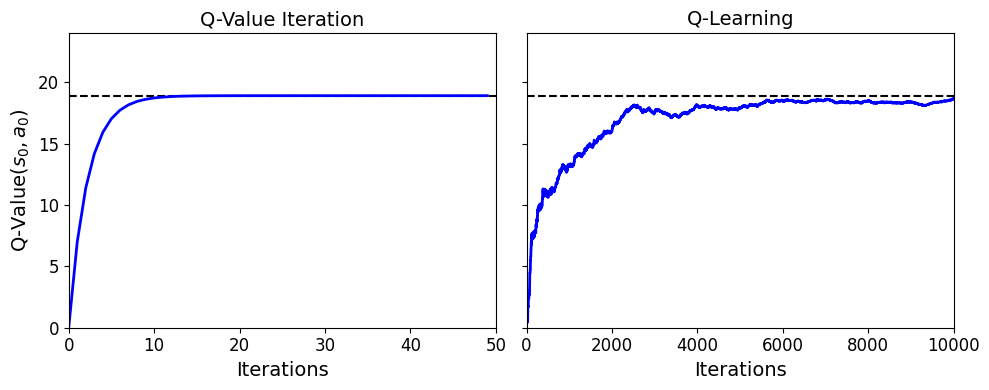

In [53]:
true_Q_value = history1[-1, 0, 0]
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])
save_fig("q_value_plot")

## Ïã¨Ï∏µ Q-Îü¨Îãù Íµ¨ÌòÑÌïòÍ∏∞

DQNÏùÑ ÎßåÎì§Ïñ¥ Î≥∏Îã§. ÏÉÅÌÉúÍ∞Ä Ï£ºÏñ¥ÏßÄÎ©¥ Í∞ÄÎä•Ìïú Î™®Îì† ÌñâÎèôÏóê ÎåÄÌï¥ÏÑú ÌñâÎèôÏùÑ ÌîåÎ†àÏù¥Ìïú ÌõÑ (ÌïòÏßÄÎßå Í≤∞Í≥ºÎ•º Î≥¥Í∏∞ Ï†ÑÏóê) Í∏∞ÎåÄÌï† Ïàò ÏûàÎäî Ìï†Ïù∏Îêú ÎØ∏Îûò Î≥¥ÏÉÅÏùò Ìï©ÏùÑ Ï∂îÏ†ïÌïúÎã§:

In [54]:
keras.backend.clear_session()
env = gym.make("CartPole-v1", render_mode="rgb_array")
input_shape = [4]  # == env.observation_space.shape
n_outputs = 2  # == env.action_space.n
model = keras.Sequential(
    [
        keras.layers.Dense(32, "elu", input_shape=input_shape), keras.layers.Dense(32, "elu"),
        keras.layers.Dense(n_outputs)
    ]
)

Ïù¥ DQNÏùÑ ÏÇ¨Ïö©Ìï¥ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÎ†§Î©¥ Í∞ÄÏû• ÌÅ∞ ÏòàÏ∏° Q-Í∞ÄÏπòÎ•º Í∞ÄÏßÑ ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÎ©¥ ÎêúÎã§. ÌïòÏßÄÎßå ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÌôòÍ≤ΩÏùÑ ÌÉêÌóòÌïòÎ†§Î©¥ `epsilon` ÌôïÎ•†Î°ú ÎûúÎç§Ìïú ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïúÎã§.

In [55]:
def epsilon_greedy_policy(state, epsilon=0):
    if rng.random() < epsilon:
        return rng.integers(n_outputs)
    Q_values = model.predict(state[np.newaxis], verbose=0, use_multiprocessing=True)
    return np.argmax(Q_values[0])

Ïû¨ÏÉù Î©îÎ™®Î¶¨ÎèÑ ÌïÑÏöîÌïòÎã§. Ïó¨Í∏∞ÏóêÎäî ÏóêÏù¥Ï†ÑÌä∏Ïùò Í≤ΩÌóòÏù¥ Îã¥Í≤® ÏûàÎã§. ÌòïÏãùÏùÄ `(obs, action, reward, next_obs, terminated, truncated)`ÏôÄ Í∞ôÎã§. `deque` ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§(Îçî Í∞ïÎ†•Ìïú Í≤ΩÌóò Ïû¨ÏÉùÏùò Íµ¨ÌòÑÏùÑ ÏúÑÌï¥ Îî•ÎßàÏù∏ÎìúÏùò [Reverb ÎùºÏù¥Î∏åÎü¨Î¶¨](https://github.com/deepmind/reverb)Î•º Ï∞∏Í≥†ÌïúÎã§):

In [56]:
from collections import deque

replay_memory = deque(maxlen=2000)

Í∑∏Î¶¨Í≥† Ïû¨ÏÉù Î©îÎ™®Î¶¨ÏóêÏÑú Í≤ΩÌóòÏùÑ ÏÉòÌîåÎßÅÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì†Îã§. Ïù¥ Ìï®ÏàòÎäî 5Í∞úÏùò ÎÑòÌååÏù¥ Î∞∞Ïó¥ `[states, actions, rewards, next_obs, terminateds, truncateds]`ÏùÑ Î∞òÌôòÌïúÎã§.

In [57]:
def sample_experiences(batch_size):
    indices = rng.integers(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, terminateds, truncateds = [
        np.array([experience[field_index] for experience in batch]) for field_index in range(6)
    ]
    return states, actions, rewards, next_states, terminateds, truncateds

Ïù¥Ï†ú DQNÏùÑ ÏÇ¨Ïö©Ìï¥ Ìïú Ïä§ÌÖùÏùÑ ÌîåÎ†àÏù¥ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Í≥† Í≤ΩÌóòÏùÑ Ïû¨ÏÉù Î©îÎ™®Î¶¨Ïóê Í∏∞Î°ùÌï† Ïàò ÏûàÎã§:

In [58]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, terminated, truncated, _ = env.step(action)
    replay_memory.append((state, action, reward, next_state, terminated, truncated))
    return next_state, terminated, truncated

ÎßàÏßÄÎßâÏúºÎ°ú Ïû¨ÏÉù Î©îÎ™®Î¶¨ÏóêÏÑú ÏïΩÍ∞ÑÏùò Í≤ΩÌóòÏùÑ ÏÉòÌîåÎßÅÌïòÍ≥† ÌõàÎ†® Ïä§ÌÖùÏùÑ ÏàòÌñâÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥∏Îã§:

In [59]:
batch_size = 32
discount_rate = .95
optimizer = keras.optimizers.Adam(1e-2)
loss_fn = keras.losses.MeanSquaredError()


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, terminateds, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0, use_multiprocessing=True)
    max_next_Q_values = np.amax(next_Q_values, 1)
    target_Q_values = rewards + (1 - (terminateds | truncateds)) * discount_rate * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.math.reduce_sum(all_Q_values * mask, 1, True)
        loss = tf.math.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

Ïù¥Ï†ú Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï¥ Î≥∏Îã§!

In [60]:
rewards = []
best_score = 0

In [61]:
for episode in range(1):  # 600
    obs, _ = env.reset()
    step = 0
    while True:
        epsilon = max(1 - episode / 500, .01)
        obs, terminated, truncated = play_one_step(env, obs, epsilon)
        if terminated | truncated:
            break
        step += 1
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print(f"Episode: {episode}, Steps: {step + 1:3}, eps: {epsilon:.3f}", end='\r')
    if episode > 50:
        training_step(batch_size)
model.set_weights(best_weights)

Í∑∏Î¶º Ï†ÄÏû• dqn_rewards_plot


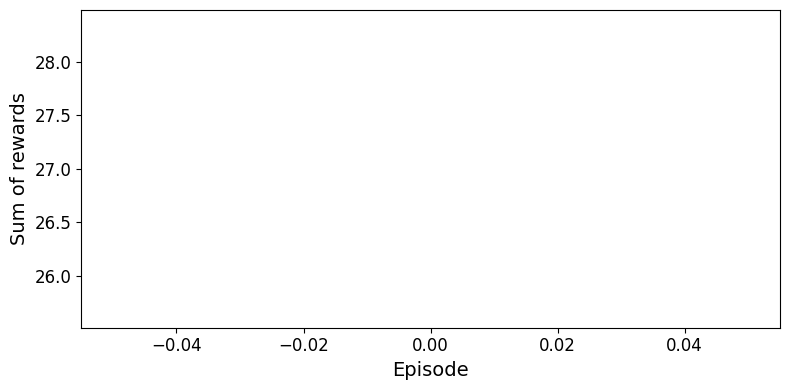

In [62]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("dqn_rewards_plot")
plt.show()

In [63]:
state, _ = env.reset()
frames = []
while True:
    img = env.render()
    frames.append(img)
    action = epsilon_greedy_policy(state)
    state, _, terminated, truncated, _ = env.step(action)
    if terminated | truncated:
        break
plot_animation(frames)

ÎÇòÏÅòÏßÄ ÏïäÎã§! üòÄ

## Ïã¨Ï∏µ Q-Îü¨ÎãùÏùò Î≥ÄÏ¢Ö

### ÎçîÎ∏î DQN

In [64]:
keras.backend.clear_session()
model = keras.Sequential(
    [keras.layers.Dense(32, "elu", input_shape=[4]), keras.layers.Dense(32, "elu"), keras.layers.Dense(n_outputs)]
)
target = keras.models.clone_model(model)
target.set_weights(model.get_weights())

In [65]:
batch_size = 32
discount_rate = .95
optimizer = keras.optimizers.Adam(6e-3)
loss_fn = keras.losses.Huber()


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, terminateds, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0, use_multiprocessing=True)
    best_next_actions = np.argmax(next_Q_values, 1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states, verbose=0, use_multiprocessing=True) * next_mask).sum(1)
    target_Q_values = rewards + (1 - (terminateds | truncateds)) * discount_rate * next_best_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.math.reduce_sum(all_Q_values * mask, 1, True)
        loss = tf.math.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [66]:
replay_memory = deque(maxlen=2000)

In [67]:
rewards = []
best_score = 0
for episode in range(1):  # 600
    obs, _ = env.reset()
    step = 0
    while True:
        epsilon = max(1 - episode / 500, .01)
        obs, terminated, truncated = play_one_step(env, obs, epsilon)
        if terminated | truncated:
            break
        step += 1
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print(f"Episode: {episode}, Steps: {step + 1:3}, eps: {epsilon:.3f}", end='\r')
    if episode >= 50:
        training_step(batch_size)
        if not episode % 50:
            target.set_weights(model.get_weights())
    # Alternatively, you can do soft updates at each step:
    # if episode >= 50:
    #     target_weights = target.get_weights()
    #     online_weights = model.get_weights()
    #     for index, online_weight in enumerate(online_weights):
    #         target_weights[index] = .99 * target_weights[index] + .01 * online_weight
    #     target.set_weights(target_weights)
model.set_weights(best_weights)

Í∑∏Î¶º Ï†ÄÏû• double_dqn_rewards_plot


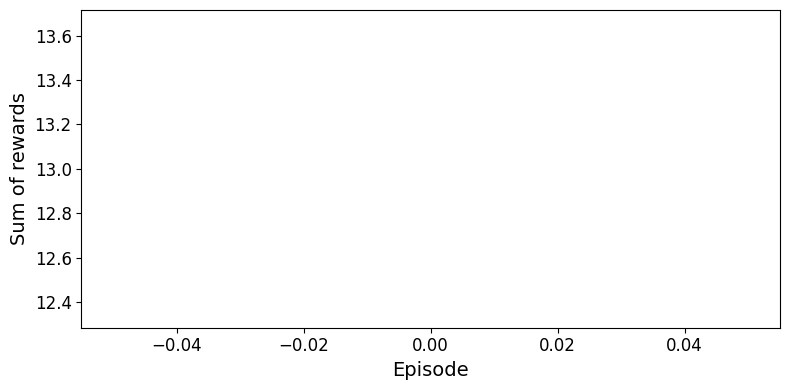

In [68]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("double_dqn_rewards_plot")
plt.show()

In [69]:
state, _ = env.reset()
frames = []
while True:
    img = env.render()
    frames.append(img)
    action = epsilon_greedy_policy(state)
    state, _, terminated, truncated, _ = env.step(action)
    if terminated | truncated:
        break
plot_animation(frames)

In [70]:
batch_size = 32
discount_rate = .95
optimizer = keras.optimizers.Adam(7.5e-3)
loss_fn = keras.losses.Huber()


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, terminateds, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0, use_multiprocessing=True)
    best_next_actions = np.argmax(next_Q_values, 1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states, verbose=0, use_multiprocessing=True) * next_mask).sum(1)
    target_Q_values = rewards + (1 - (terminateds | truncateds)) * discount_rate * next_best_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.math.reduce_sum(all_Q_values * mask, 1, True)
        loss = tf.math.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [71]:
replay_memory = deque(maxlen=2000)

In [72]:
rewards = []
best_score = 0
for episode in range(1):  # 600
    obs, _ = env.reset()
    step = 0
    while True:
        epsilon = max(1 - episode / 500, .01)
        obs, terminated, truncated = play_one_step(env, obs, epsilon)
        if terminated | truncated:
            break
        step += 1
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print(f"Episode: {episode}, Steps: {step + 1:3}, eps: {epsilon:.3f}", end='\r')
    if episode >= 50:
        training_step(batch_size)
        if not episode % 50:
            target.set_weights(model.get_weights())
model.set_weights(best_weights)

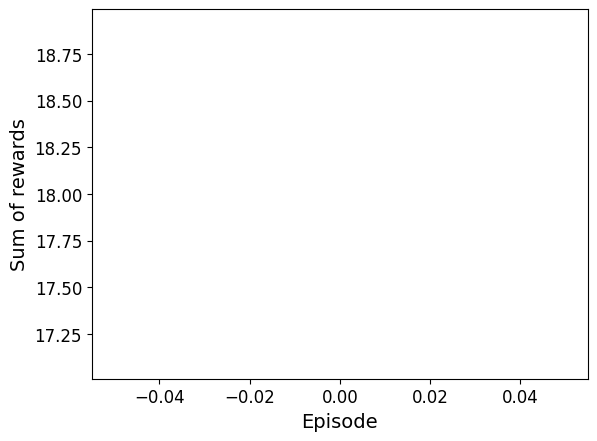

In [73]:
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Sum of rewards")
plt.show()

In [74]:
state, _ = env.reset()
frames = []
while True:
    action = epsilon_greedy_policy(state)
    state, _, terminated, truncated, _ = env.step(action)
    if terminated | truncated:
        break
    img = env.render()
    frames.append(img)
plot_animation(frames)

Îß§Ïö∞ ÏïàÏ†ïÏ†ÅÏù∏ ÏóêÏù¥Ï†ÑÌä∏ Í∞ôÎã§!

In [75]:
env.close()

## TF-Agents ÎùºÏù¥Î∏åÎü¨Î¶¨

TF-AgentsÎ•º ÏÇ¨Ïö©Ìï¥ Î∏åÎ†àÏù¥ÌÅ¨ÏïÑÏõÉ ÌîåÎ†àÏù¥Î•º ÌïôÏäµÌïòÎäî ÏóêÏù¥Ï†ÑÌä∏Î•º ÎßåÎì§Ïñ¥ Î≥∏Îã§. Ïã¨Ï∏µ Q-Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†Îã§. Îî∞ÎùºÏÑú Ïù¥Ï†Ñ Íµ¨ÌòÑÍ≥º Íµ¨ÏÑ± ÏöîÏÜåÎ•º ÏâΩÍ≤å ÎπÑÍµêÌï† Ïàò ÏûàÎã§. ÌïòÏßÄÎßå TF-AgentsÏóêÎäî Îã§Î•∏ (Í∑∏Î¶¨Í≥† Î≥µÏû°Ìïú) ÏïåÍ≥†Î¶¨Ï¶òÏù¥ ÎßéÏù¥ Íµ¨ÌòÑÎêòÏñ¥ ÏûàÎã§!

### TF-Agents ÌôòÍ≤Ω

In [76]:
import suite_gym

env = suite_gym.load("ALE/Breakout-v5", gym_kwargs={"render_mode": "rgb_array"})
env

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [77]:
env.gym

<OrderEnforcing<PassiveEnvChecker<AtariEnv<ALE/Breakout-v5>>>>

In [78]:
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})

In [79]:
env.step(1)  # Fire

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1, dtype=int32)})

/usr/local/lib/python3.8/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Í∑∏Î¶º Ï†ÄÏû• breakout_plot


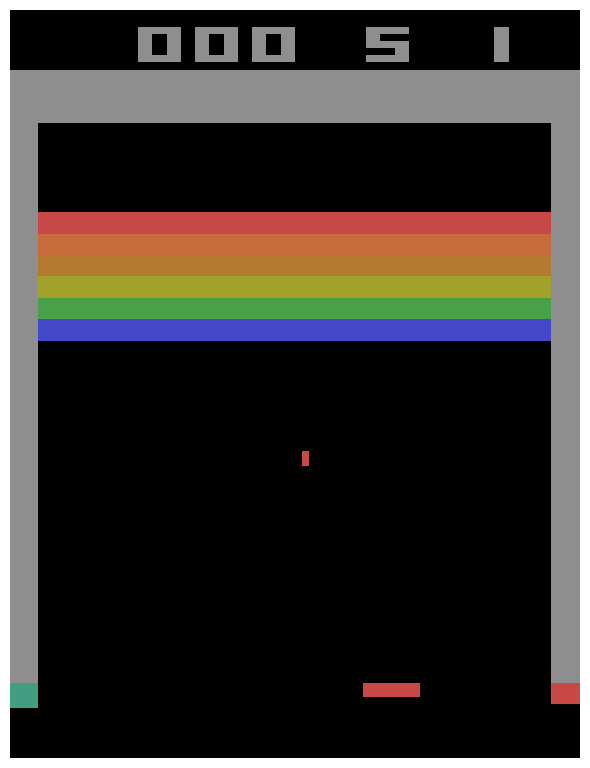

In [80]:
img = env.render()
plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis("off")
save_fig("breakout_plot")
plt.show()

In [81]:
env.current_time_step()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1, dtype=int32)})

### ÌôòÍ≤Ω Ïä§Ìéô

In [82]:
env.observation_spec()

BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255)

In [83]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)

In [84]:
env.time_step_spec()

TimeStep(
{'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')})

### ÌôòÍ≤Ω ÎûòÌçºÏôÄ ÏïÑÌÉÄÎ¶¨ Ï†ÑÏ≤òÎ¶¨

TF-Agents ÎûòÌçºÎ°ú Gymnasium ÌôòÍ≤ΩÏùÑ Í∞êÏåÄ Ïàò ÏûàÎã§:

In [85]:
from tf_agents.environments import ActionRepeat

repeating_env = ActionRepeat(env, 4)
repeating_env

In [86]:
repeating_env.unwrapped

Í∞ÄÎä•Ìïú ÎûòÌçº Î™©Î°ùÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§:

In [87]:
import tf_agents.environments.wrappers

for name in dir(tf_agents.environments.wrappers):
    obj = getattr(tf_agents.environments.wrappers, name)
    if hasattr(obj, "__base__") and issubclass(obj, tf_agents.environments.PyEnvironmentBaseWrapper):
        n = '\n'
        print(f"{name:27s} {obj.__doc__.split(n)[0]}")

ActionClipWrapper           Wraps an environment and clips actions to spec before applying.
ActionDiscretizeWrapper     Wraps an environment with continuous actions and discretizes them.
ActionOffsetWrapper         Offsets actions to be zero-based.
ActionRepeat                Repeates actions over n-steps while acummulating the received reward.
ExtraDisabledActionsWrapper Adds extra unavailable actions.
FixedLength                 Truncates long episodes and pads short episodes to have a fixed length.
FlattenActionWrapper        Flattens the action.
FlattenObservationsWrapper  Wraps an environment and flattens nested multi-dimensional observations.
GoalReplayEnvWrapper        Adds a goal to the observation, used for HER (Hindsight Experience Replay).
HistoryWrapper              Adds observation and action history to the environment's observations.
ObservationFilterWrapper    Filters observations based on an array of indexes.
OneHotActionWrapper         Converts discrete action to one_h

In [88]:
from functools import partial
from gymnasium.wrappers import TimeLimit

limited_repeating_env = suite_gym.load(
    "ALE/Breakout-v5",
    gym_env_wrappers=[partial(TimeLimit, max_episode_steps=10000)],
    env_wrappers=[partial(ActionRepeat, times=4)]
)

In [89]:
limited_repeating_env

In [90]:
limited_repeating_env.unwrapped

ÏïÑÌÉÄÎ¶¨ Î∏åÎ†àÏù¥ÌÅ¨ÏïÑÏõÉ ÌôòÍ≤ΩÏùÑ ÎßåÎì§Í≥† Í∏∞Î≥∏ ÏïÑÌÉÄÎ¶¨ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÎ•º Ï†ÅÏö©ÌïúÎã§:

**Í≤ΩÍ≥†**: Î∏åÎ†àÏù¥ÌÅ¨ÏïÑÏõÉÏùÄ Í≤åÏûÑ ÏãúÏûëÍ≥º Ï£ΩÏùÑ ÎïåÎßàÎã§ FIRE Î≤ÑÌäºÏùÑ ÎàåÎü¨Ïïº ÌïúÎã§. Ï≤òÏùåÏóêÎäî FIRE Î≤ÑÌäºÏùÑ ÎàÑÎ•¥Îäî Í≤ÉÏù¥ Îπ®Î¶¨ ÏßÄÎäî Í≤ÉÏ≤òÎüº Î≥¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ïù¥Î•º Î∞∞Ïö∞ÎäîÎç∞ Îß§Ïö∞ Ïò§Îûú ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÎã§. ÌõàÎ†® ÏÜçÎèÑÎ•º ÎÜíÏù¥Î†§Î©¥ `AtariPreprocessing` ÎûòÌçº ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÌïòÏó¨ `AtariPreprocessingWithAutoFire`Î•º ÎßåÎì§Í≥† ÏÇ¨Ïö©ÌïúÎã§. Ïù¥ ÌÅ¥ÎûòÏä§Îäî Í≤åÏûÑ ÏãúÏûëÍ≥º ÎßêÏù¥ Ï£ΩÏùÑ ÎïåÎßàÎã§ ÏûêÎèôÏúºÎ°ú FIRE(Ï¶â ÌîåÎ†àÏù¥ ÌñâÎèô 1)Î•º ÎàÑÎ•∏Îã§.

In [91]:
from gymnasium.wrappers import AtariPreprocessing
from frame_stack import FrameStack

max_episode_steps = 27000  # <=> 108k ALE ÌîÑÎ†àÏûÑ(1Îã®Í≥Ñ = 4 ÌîÑÎ†àÏûÑÏù¥ÎØÄÎ°ú)
environment_name = "ALE/Breakout-v5"


class AtariPreprocessingWithAutoFire(AtariPreprocessing):
    def reset(self, **kwargs):
        obs = super().reset(**kwargs)
        super().step(1)  # ÏãúÏûëÌïòÎ†§Î©¥ FIRE
        return obs

    def step(self, action):
        lives_before_action = self.ale.lives()
        obs, rewards, terminated, truncated, info = super().step(action)
        if self.ale.lives() < lives_before_action and not terminated | truncated:
            super().step(1)  # ÏÉùÎ™ÖÏùÑ ÏûÉÏùÄ ÌõÑ ÏãúÏûëÌïòÍ∏∞ ÏúÑÌï¥ FIRE
        return obs, rewards, terminated, truncated, info


env = suite_gym.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessingWithAutoFire, partial(FrameStack, num_stack=4)],
    gym_kwargs={"frameskip": 1}
)

In [92]:
env

Î™á Í∞úÏùò Ïä§ÌÖùÏùÑ ÌîåÎ†àÏù¥ÌïòÍ≥† Ïñ¥ÎñªÍ≤å ÎèôÏûëÌïòÎäîÏßÄ ÌôïÏù∏ÌïúÎã§:

In [93]:
env.reset()
for _ in range(4):
    time_step = env.step(3)  # ÏôºÏ™Ω

In [94]:
def plot_observation(obs):
    # Ïª¨Îü¨ Ï±ÑÎÑêÏù¥ 3Í∞úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê 4 ÌîÑÎ†àÏûÑÏùÑ Ï∂úÎ†•Ìï† Ïàò ÏóÜÎã§.
    # Îî∞ÎùºÏÑú ÌòÑÏû¨ ÌîÑÎ†àÏûÑÍ≥º Îã§Î•∏ ÌîÑÎ†àÏûÑÏùò ÌèâÍ∑† Í∞íÏùÑ Î∫Ä Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞ÌïúÎã§.
    # Í∑∏Îã§Ïùå Ïù¥ Ï∞®Ïù¥Î•º ÌòÑÏû¨ ÌîÑÎ†àÏûÑÏùò Îπ®Í∞ïÍ≥º ÌååÎûë Ï±ÑÎÑêÏóê ÎçîÌï¥ÏÑú Î≥¥Îùº ÏÉâÏùÑ Íµ¨ÌïúÎã§.
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis("off")

Í∑∏Î¶º Ï†ÄÏû• preprocessed_breakout_plot


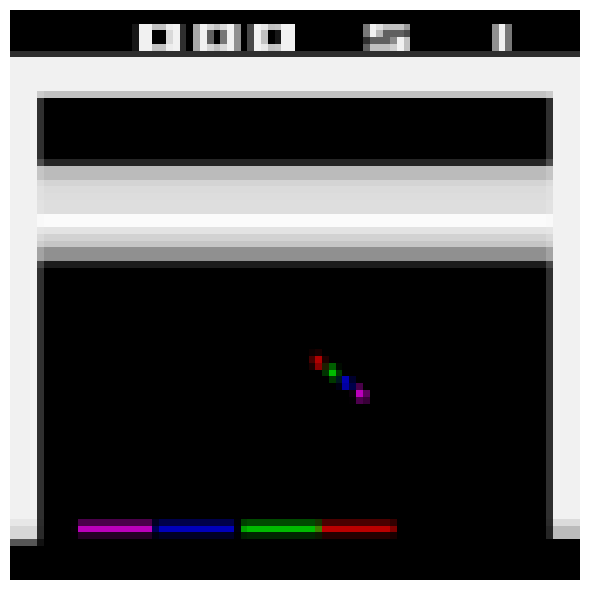

In [95]:
plt.figure(figsize=(6, 6))
plot_observation(time_step.observation)
save_fig("preprocessed_breakout_plot")
plt.show()

ÌååÏù¥Ïç¨ ÌôòÍ≤ΩÏùÑ TF ÌôòÍ≤ΩÏúºÎ°ú Î≥ÄÌôòÌïúÎã§:

In [96]:
from tf_agents.environments import TFPyEnvironment

tf_env = TFPyEnvironment(env)

### Ïã¨Ï∏µ Q-ÎÑ§Ìä∏ÏõåÌÅ¨ ÎßåÎì§Í∏∞

Í¥ÄÏ∏°ÏùÑ Ï†ïÍ∑úÌôîÌïòÎäî ÏûëÏùÄ ÌÅ¥ÎûòÏä§Î•º ÎßåÎì†Îã§. Ïù¥ÎØ∏ÏßÄÎ•º 0 ~ 255 ÏÇ¨Ïù¥Ïùò Î∞îÏù¥Ìä∏Î°ú Ï†ÄÏû•ÌïòÎäî Í≤ÉÏù¥ Îû®ÏùÑ Ï†ÅÍ≤å ÏÇ¨Ïö©ÌïòÏßÄÎßå Ïã†Í≤ΩÎßùÏóêÎäî 0.0 ~ 1.0 ÏÇ¨Ïù¥Ïùò Ïã§ÏàòÎ•º Ï†ÑÎã¨Ìï¥Ïïº ÌïúÎã§:

Q-ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÎßåÎì†Îã§:

In [97]:
from tf_agents.networks.q_network import QNetwork

preprocessing_layer = keras.layers.Lambda(lambda obs: tf.cast(obs, np.float32) / 255.)
conv_layer_params = [(32, (8, 8), 4), (64, (4, 4), 2), (64, (3, 3), 1)]
fc_layer_params = [512]
q_net = QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    preprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params
)

DQN ÏóêÏù¥Ï†ÑÌä∏Î•º ÎßåÎì†Îã§:

In [98]:
from tf_agents.agents import DqnAgent

train_step = tf.Variable(0)
update_period = 4  # 4 Ïä§ÌÖùÎßàÎã§ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïúÎã§.
optimizer = keras.optimizers.experimental.RMSprop(2.5e-4, .95, epsilon=.00001, centered=True)
epsilon_fn = keras.optimizers.schedules.PolynomialDecay(
    1., 250000 // update_period, .01  # Ï¥àÍ∏∞ Œµ, <=> 1,000,000 ALE ÌîÑÎ†àÏûÑ, ÎßàÏßÄÎßâ Œµ
)
agent = DqnAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    q_net,
    optimizer,
    epsilon_greedy=lambda: epsilon_fn(train_step),
    target_update_period=2000,  # <=> 32,000 ALE ÌîÑÎ†àÏûÑ
    td_errors_loss_fn=keras.losses.Huber(reduction="none"),
    gamma=.99,  # Ìï†Ïù∏ Í≥ÑÏàò
    train_step_counter=train_step
)
agent.initialize()

2023-06-08 03:37:17.100245: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Ïû¨ÏÉù Î≤ÑÌçºÎ•º ÎßåÎì†Îã§(Îû®ÏùÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Î©îÎ™®Î¶¨ Î∂ÄÏ°± ÏóêÎü¨Í∞Ä ÎÇòÏò§Î©¥ Î≤ÑÌçº ÌÅ¨Í∏∞Î•º Ï§ÑÏù∏Îã§):

**Í≤ΩÍ≥†**: 1,000,000Ïù¥ ÏïÑÎãå 100,000 ÌÅ¨Í∏∞Ïùò Ïû¨ÏÉù Î≤ÑÌçºÎ•º ÏÇ¨Ïö©ÌïúÎã§. ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ Î©îÎ™®Î¶¨ Î∂ÄÏ°± ÏóêÎü¨Í∞Ä ÎÇòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

In [99]:
from tf_agents.replay_buffers import TFUniformReplayBuffer

replay_buffer = TFUniformReplayBuffer(agent.collect_data_spec, tf_env.batch_size, 100000)  # OOM ÏóêÎü¨Í∞Ä ÎÇòÎ©¥ Ï§ÑÏù∏Îã§
replay_buffer_observer = replay_buffer.add_batch

2023-06-08 03:37:17.268821: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2822400000 exceeds 10% of free system memory.


Ìò∏Ï∂ú ÌöüÏàòÎ•º Ïπ¥Ïö¥Ìä∏ÌïòÍ≥† Ï∂úÎ†•ÌïòÎäî Í∞ÑÎã®Ìïú ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÏòµÏ†ÄÎ≤ÑÎ•º ÎßåÎì†Îã§(ÌïòÎÇòÏùò Ïä§ÌÖùÏúºÎ°ú Ïπ¥Ïö¥Ìä∏ÌïòÏßÄ ÏïäÎäî Îëê ÏóêÌîºÏÜåÎìú ÏÇ¨Ïù¥Ïùò Í≤ΩÍ≥ÑÎäî Ï†úÏô∏ÌïúÎã§):

In [100]:
class ShowProgress:
    def __init__(self, total):
        self.counter = 0
        self.total = total

    def __call__(self, trajectory):
        if not trajectory.is_boundary():
            self.counter += 1
        if self.counter % 100 == 0:
            print(f"\r{self.counter}/{self.total}", end='')

ÌõàÎ†® Ï∏°Ï†ï ÏßÄÌëúÎ•º Ï∂îÍ∞ÄÌï¥ Î≥∏Îã§:

In [101]:
import tf_metrics

train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric()
]

In [102]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [103]:
import logging

from tf_metrics import log_metrics

logging.getLogger().setLevel(logging.INFO)
log_metrics(train_metrics)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 0
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0
